# Perfect Foresight CRRA Model - Saving Rate

[![badge](https://img.shields.io/badge/Launch%20using%20-Econ--ARK-blue)](https://econ-ark.org/materials/perfforesightcrra-savingrate#launch)


This notebook demonstrates how to obtain the saving rate of a forward-looking consumer using HARK.

In [1]:
# Preliminaries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import HARK 
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plot_funcs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

## 1. Creating an agent

We now import the HARK class that represents a perfect-foresight consumer with CRRA utility, and create an instance of it with the parameters we'd like.

In [2]:
# Set up a HARK Perfect Foresight Consumer called PFsavrate
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType # Import the consumer type

# Now we need to "fill" our consumer with parameters that allow us to solve the consumer's problem

# First we need to set out a dictionary
ρ = CRRA = 2.            # Coefficient of relative risk aversion
Rfree = 1.03             # Interest factor on assets
β = DiscFac = 0.97       # Intertemporal discount factor
LivPrb = [1.0]           # Survival probability
Γ = PermGroFac = [1.01]  # Permanent income growth factor
AgentCount = 1           # Number of agents of this type (only matters for simulation# Number of periods in the cycle for this agent type
cycles = 0               # Agent is infinitely lived
T_cycle = 1              # Every period is the same

# Make a dictionary to specify a perfect foresight consumer type
dict_wealth = { 'CRRA': CRRA,
                'Rfree': Rfree,
                'DiscFac': DiscFac,
                'LivPrb': LivPrb,
                'PermGroFac': PermGroFac,
                'AgentCount': AgentCount,
                'cycles' : cycles,
                'T_cycle' : T_cycle,
                }

# Now lets pass our dictionary to our consumer class
PFsavrate = PerfForesightConsumerType(**dict_wealth)

## 2. Solving the consumer's problem and finding the saving rate.

The next step is to ask HARK to solve the agent's optimal consumption problem. The result, or what we call "solution", is a function `cFunc` that tells us what is the optimal amount to consume at each level of normalized market resources.

The next cell solves the agent and tests the function

In [3]:
PFsavrate.solve()
test_m = 4
test_c = PFsavrate.solution[0].cFunc(test_m)

print("When normalized market resources are m={}, the agent's normalized consumption should be c={}".format(test_m,test_c))

When normalized market resources are m=4, the agent's normalized consumption should be c=1.611193200855211


We are now ready to think about the saving rate of the consumer.

Remember that the saving rate of an agent at time $t$ is

\begin{equation}
\text{Saving Rate}_t = \frac{\text{Capital Income}_t + \text{Labor Income}_t - \text{Consumption_t}}{\text{Capital Income}_t + \text{Labor Income}_t}
\end{equation}

Dividing both the numerator and denominator by the agent's permanent income $\textbf{P}_t$ and adopting the notation in [the course's lecture notes](https://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Consumption/PerfForesightCRRA/) we have

\begin{equation}
\begin{split}
\text{Saving Rate}_t &= \frac{a_{t-1}*r/\Gamma + 1 - c(m_t)}{a_{t-1}*r/\Gamma + 1}\\
&=\frac{a_{t-1}*r/\Gamma + 1 - c(a_{t-1}*R/\Gamma + 1)}{a_{t-1}*r/\Gamma + 1}
\end{split}
\end{equation}

We now have an expression for the saving rate as a function of the previous period's end-of-period normalized assets $a_t$. The cell below calculates and plots this relationship for different levels of $a_t$. 

Text(0, 0.5, 'Saving Rate')

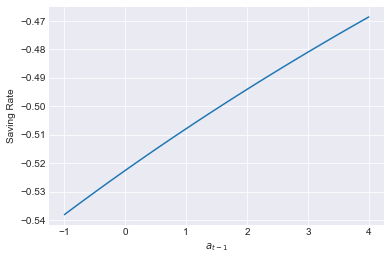

In [4]:
# Create a grid for a
a_tm1 = np.linspace(-1,4)

# Compute income components at every a
cap_income_t = a_tm1*(Rfree-1)/Γ
lab_income_t = 1

# and market resources
m_t = a_tm1 * Rfree/Γ + 1

# Consumption
c_t = PFsavrate.solution[0].cFunc(m_t)

# and finally the saving rate
ς_t = sav_rate_t = (cap_income_t + lab_income_t - c_t) / (cap_income_t + lab_income_t)

# And now the plot
plt.plot(a_tm1, sav_rate_t)
plt.xlabel(r'$a_{t-1}$')
plt.ylabel('Saving Rate')